In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv("garments_worker_productivity.csv")

In [3]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
df["date"] = pd.to_datetime(df["date"])

In [6]:
df['week_of_year'] = df['date'].dt.isocalendar().week
df['day_of_week'] = df['date'].dt.dayofweek
df['month_of_year'] = df['date'].dt.month

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [8]:
df.drop("date", axis = 1, inplace = True)

In [9]:
cat_col = []
num_col = []
for i in df.columns:
  if df[i].dtypes == object:
    cat_col.append(i)
  else:
    num_col.append(i)



In [10]:
cat_col

['quarter', 'department', 'day']

In [11]:
num_col

['team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity',
 'week_of_year',
 'day_of_week',
 'month_of_year']

In [12]:
aside_num = num_col.remove("actual_productivity")

In [13]:
num_col

['team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'week_of_year',
 'day_of_week',
 'month_of_year']

In [14]:
print('Unique Vaues in Department before cleaning:')
print(df.department.unique())


df['department'] = df.department.str.strip()


print('Unique Vaues in Department afer cleaning:')
print(df.department.unique())

Unique Vaues in Department before cleaning:
['sweing' 'finishing ' 'finishing']
Unique Vaues in Department afer cleaning:
['sweing' 'finishing']


In [15]:


df["department"] = df["department"].str.replace('sweing', 'sewing')

In [16]:
print(df.department.unique())

['sewing' 'finishing']


In [17]:
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,week_of_year,day_of_week,month_of_year
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,3,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1,3,1
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,3,1
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,3,1
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,11,2,3
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,11,2,3
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,11,2,3
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,11,2,3


In [18]:
%pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [19]:
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,week_of_year,day_of_week,month_of_year
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,3,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1,3,1
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,3,1
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,3,1
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,11,2,3
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,11,2,3
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,11,2,3
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,11,2,3


In [20]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,week_of_year,day_of_week,month_of_year
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091,5.949039,2.812865,1.724311
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488,2.983776,2.112252,0.744558
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705,1.000000,0.000000,1.000000
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307,3.000000,1.000000,1.000000
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333,6.000000,2.000000,2.000000
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253,9.000000,5.000000,2.000000
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437,11.000000,6.000000,3.000000


1
12


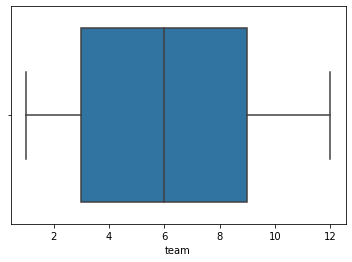

0.07
0.8


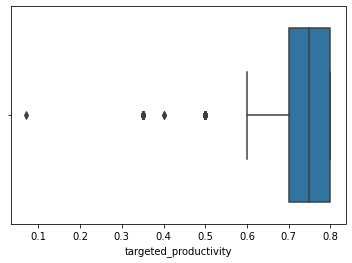

2.9
54.56


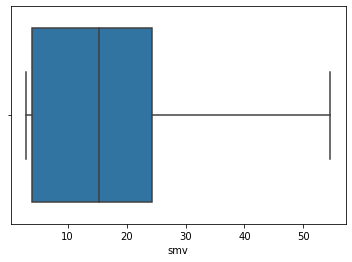

7.0
23122.0


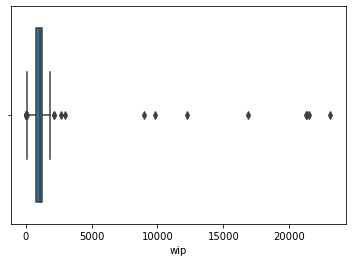

0
25920


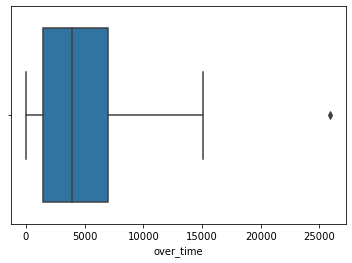

0
3600


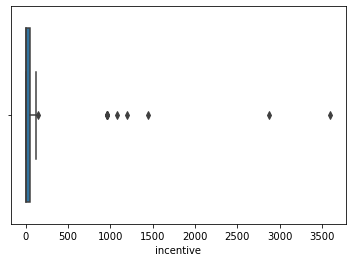

0.0
300.0


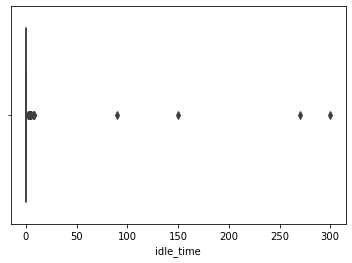

0
45


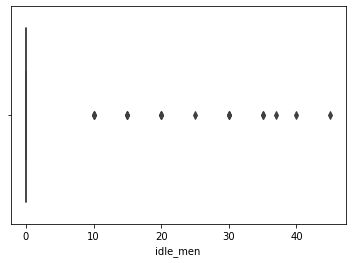

0
2


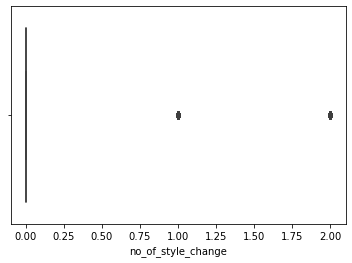

2.0
89.0


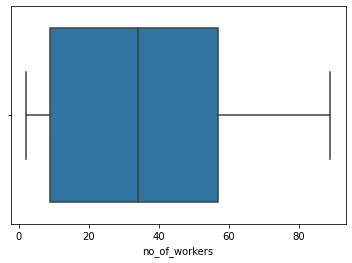

1
11


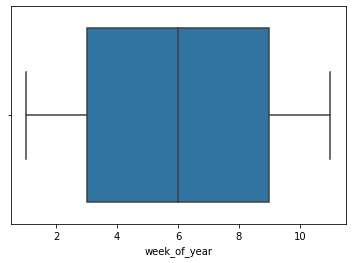

0
6


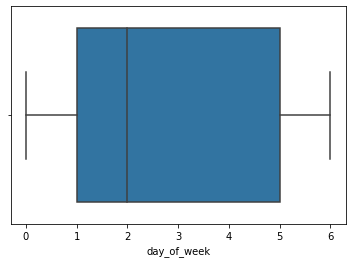

1
3


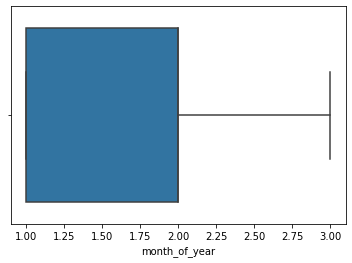

In [21]:
for i in num_col:
  sns.boxplot(data = df, x = i)
  print(df[i].min())
  print(df[i].max())
  plt.show()

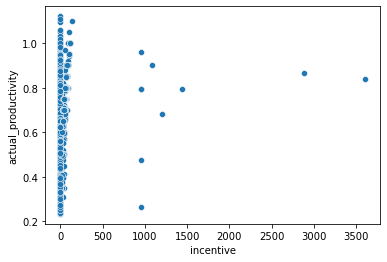

In [22]:
sns.scatterplot(data = df, x = "incentive", y = "actual_productivity")
plt.show()

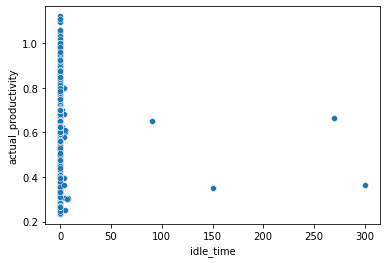

In [23]:
sns.scatterplot(data = df, x = "idle_time", y = "actual_productivity")
plt.show()

In [24]:
df["incentive"].corr(df["actual_productivity"])

0.07653762727386514

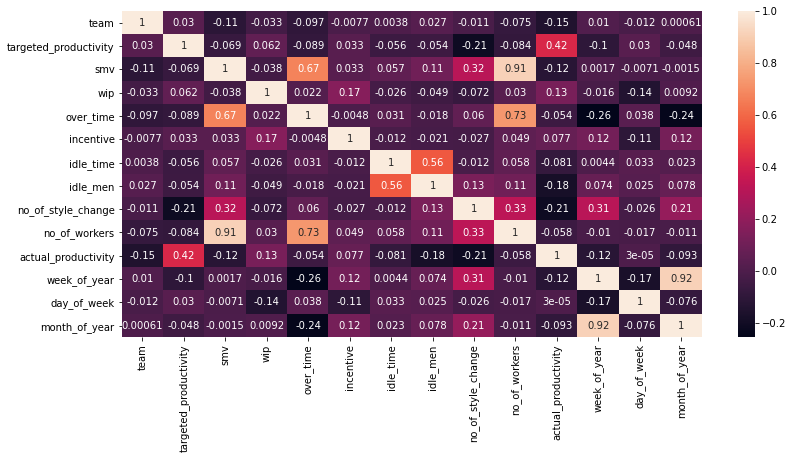

In [25]:
fig, ax = plt.subplots(figsize = (13, 6), linewidth= 2.4)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [26]:
for i in df.columns:
  if df[i].isnull().sum() != 0:
      df[i] = df[i].fillna(0)
      print(df[i])


0       1108.0
1          0.0
2        968.0
3        968.0
4       1170.0
         ...  
1192       0.0
1193       0.0
1194       0.0
1195       0.0
1196       0.0
Name: wip, Length: 1197, dtype: float64


In [27]:
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,week_of_year,day_of_week,month_of_year
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,3,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,3,1
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,3,1
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,3,1
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333,11,2,3
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,11,2,3
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,11,2,3
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889,11,2,3


In [28]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,week_of_year,day_of_week,month_of_year
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,687.228070,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091,5.949039,2.812865,1.724311
std,3.463963,0.097891,10.943219,1514.582341,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488,2.983776,2.112252,0.744558
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705,1.000000,0.000000,1.000000
25%,3.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307,3.000000,1.000000,1.000000
50%,6.000000,0.750000,15.260000,586.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333,6.000000,2.000000,2.000000
75%,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253,9.000000,5.000000,2.000000
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437,11.000000,6.000000,3.000000


In [29]:
outliers_to_fix = ["over_time", "incentive", "idle_men", "idle_time"]

In [30]:
df[outliers_to_fix] = np.log(df[outliers_to_fix] + 1)

In [31]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,week_of_year,day_of_week,month_of_year
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,687.228070,7.923723,1.963381,0.036899,0.047245,0.150376,34.609858,0.735091,5.949039,2.812865,1.724311
std,3.463963,0.097891,10.943219,1514.582341,1.551389,2.023276,0.351984,0.386654,0.427848,22.197687,0.174488,2.983776,2.112252,0.744558
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705,1.000000,0.000000,1.000000
25%,3.000000,0.700000,3.940000,0.000000,7.273093,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307,3.000000,1.000000,1.000000
50%,6.000000,0.750000,15.260000,586.000000,8.284252,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333,6.000000,2.000000,2.000000
75%,9.000000,0.800000,24.260000,1083.000000,8.848078,3.931826,0.000000,0.000000,0.000000,57.000000,0.850253,9.000000,5.000000,2.000000
max,12.000000,0.800000,54.560000,23122.000000,10.162809,8.188967,5.707110,3.828641,2.000000,89.000000,1.120437,11.000000,6.000000,3.000000


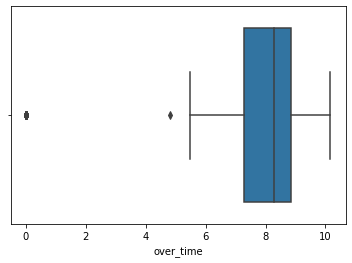

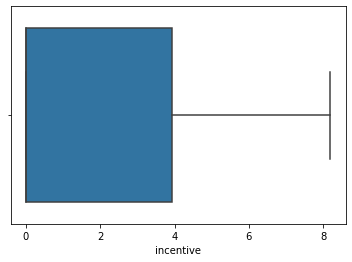

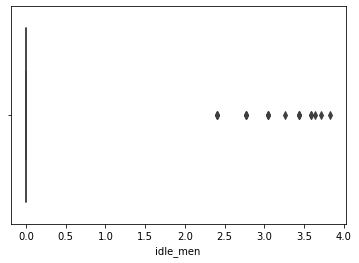

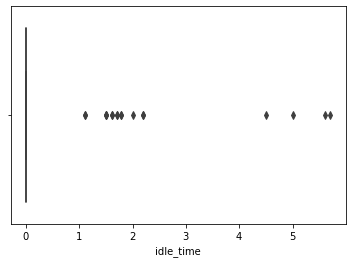

In [32]:
for i in outliers_to_fix:
  sns.boxplot(data = df, x = i)
  plt.show()

In [105]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from catboost import CatBoostRegressor
from skopt import BayesSearchCV

In [34]:
cat_col

['quarter', 'department', 'day']

In [35]:
cat_col_to_dummy = cat_col

In [36]:
df = pd.get_dummies(df, cat_col_to_dummy)

In [37]:

df

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sewing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,1108.0,8.865170,4.595120,0.0,0.0,0,59.0,...,0,0,0,1,0,0,0,1,0,0
1,1,0.75,3.94,0.0,6.867974,0.000000,0.0,0.0,0,8.0,...,0,0,1,0,0,0,0,1,0,0
2,11,0.80,11.41,968.0,8.205492,3.931826,0.0,0.0,0,30.5,...,0,0,0,1,0,0,0,1,0,0
3,12,0.80,11.41,968.0,8.205492,3.931826,0.0,0.0,0,30.5,...,0,0,0,1,0,0,0,1,0,0
4,6,0.80,25.90,1170.0,7.560601,3.931826,0.0,0.0,0,56.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,0.0,6.867974,0.000000,0.0,0.0,0,8.0,...,0,0,1,0,0,0,0,0,0,1
1193,8,0.70,3.90,0.0,6.867974,0.000000,0.0,0.0,0,8.0,...,0,0,1,0,0,0,0,0,0,1
1194,7,0.65,3.90,0.0,6.867974,0.000000,0.0,0.0,0,8.0,...,0,0,1,0,0,0,0,0,0,1
1195,9,0.75,2.90,0.0,7.496097,0.000000,0.0,0.0,0,15.0,...,0,0,1,0,0,0,0,0,0,1


In [38]:
df

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sewing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,1108.0,8.865170,4.595120,0.0,0.0,0,59.0,...,0,0,0,1,0,0,0,1,0,0
1,1,0.75,3.94,0.0,6.867974,0.000000,0.0,0.0,0,8.0,...,0,0,1,0,0,0,0,1,0,0
2,11,0.80,11.41,968.0,8.205492,3.931826,0.0,0.0,0,30.5,...,0,0,0,1,0,0,0,1,0,0
3,12,0.80,11.41,968.0,8.205492,3.931826,0.0,0.0,0,30.5,...,0,0,0,1,0,0,0,1,0,0
4,6,0.80,25.90,1170.0,7.560601,3.931826,0.0,0.0,0,56.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,0.0,6.867974,0.000000,0.0,0.0,0,8.0,...,0,0,1,0,0,0,0,0,0,1
1193,8,0.70,3.90,0.0,6.867974,0.000000,0.0,0.0,0,8.0,...,0,0,1,0,0,0,0,0,0,1
1194,7,0.65,3.90,0.0,6.867974,0.000000,0.0,0.0,0,8.0,...,0,0,1,0,0,0,0,0,0,1
1195,9,0.75,2.90,0.0,7.496097,0.000000,0.0,0.0,0,15.0,...,0,0,1,0,0,0,0,0,0,1


In [39]:
y = df["actual_productivity"]

In [40]:
X = df.drop("actual_productivity", axis = 1)

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1197 non-null   int64  
 1   targeted_productivity  1197 non-null   float64
 2   smv                    1197 non-null   float64
 3   wip                    1197 non-null   float64
 4   over_time              1197 non-null   float64
 5   incentive              1197 non-null   float64
 6   idle_time              1197 non-null   float64
 7   idle_men               1197 non-null   float64
 8   no_of_style_change     1197 non-null   int64  
 9   no_of_workers          1197 non-null   float64
 10  week_of_year           1197 non-null   UInt32 
 11  day_of_week            1197 non-null   int64  
 12  month_of_year          1197 non-null   int64  
 13  quarter_Quarter1       1197 non-null   uint8  
 14  quarter_Quarter2       1197 non-null   uint8  
 15  quar

In [42]:
scaler = RobustScaler()

In [43]:
X[num_col] = scaler.fit_transform(X[num_col])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(957, 26)
(240, 26)
(957,)
(240,)


# CATBOOST MODEL


In [46]:
cat = CatBoostRegressor()

In [67]:
parameters = {'learning_rate': [0.009,0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
              'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
               

}






In [48]:
LR = BayesSearchCV(estimator = cat, search_spaces=parameters, n_jobs= -1, cv=10, n_iter=6, verbose=4)

In [49]:
LR.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.1743351	test: 0.1609250	best: 0.1609250 (0)	total: 147ms	remaining: 2m 26s
1:	learn: 0.1723167	test: 0.1588126	best: 0.1588126 (1)	total: 149ms	remaining: 1m 14s
2:	learn: 0.1698875	test: 0.1567976	best: 0.1567976 (2)	total: 150ms	remaining: 49.8s
3:	learn: 0.1676392	test: 0.1545317	best: 0.1545317 (3)	total: 151ms	remaining: 37.6s
4:	learn: 0.1650046	test: 0.1520707	best: 0.1520707 (4)	total: 152ms	remaining: 30.2s
5:	learn: 0.1634449	test: 0.1507055	best: 0.1507055 (5)	total: 153ms	remaining: 25.3s
6:	learn: 0.1615789	test: 0.1489229	best: 0.1489229 (6)	total: 154ms	remaining: 21.8s
7:	learn: 0.1597810	test: 0.1471577	best: 0.1471577 (7)	total: 155ms	remaining: 19.2s
8:	learn: 0.1579192	test: 0.1453518	best: 0.1453518 (8)	total: 156ms	remaining: 17.2s
9:	learn: 0.1563887	test: 0.1440537	best: 0.1440537 (9)	total: 157ms	remaining: 15.5s
10:	learn: 0.1550410	test: 0.1428490	best: 0.1428490 (10)	total: 158ms	remaining: 14.2s
11:	learn: 0.1537642	test: 0.1418005	best: 0.14180

151:	learn: 0.1099333	test: 0.1197862	best: 0.1192899 (110)	total: 301ms	remaining: 1.68s
152:	learn: 0.1099121	test: 0.1197995	best: 0.1192899 (110)	total: 302ms	remaining: 1.67s
153:	learn: 0.1098853	test: 0.1198236	best: 0.1192899 (110)	total: 304ms	remaining: 1.67s
154:	learn: 0.1098065	test: 0.1198652	best: 0.1192899 (110)	total: 305ms	remaining: 1.66s
155:	learn: 0.1097086	test: 0.1199456	best: 0.1192899 (110)	total: 306ms	remaining: 1.65s
156:	learn: 0.1095604	test: 0.1198357	best: 0.1192899 (110)	total: 307ms	remaining: 1.65s
157:	learn: 0.1095485	test: 0.1198524	best: 0.1192899 (110)	total: 308ms	remaining: 1.64s
158:	learn: 0.1095376	test: 0.1198547	best: 0.1192899 (110)	total: 309ms	remaining: 1.63s
159:	learn: 0.1094639	test: 0.1198146	best: 0.1192899 (110)	total: 310ms	remaining: 1.63s
160:	learn: 0.1094535	test: 0.1198174	best: 0.1192899 (110)	total: 311ms	remaining: 1.62s
161:	learn: 0.1093958	test: 0.1198797	best: 0.1192899 (110)	total: 312ms	remaining: 1.61s
162:	learn

278:	learn: 0.1005588	test: 0.1201458	best: 0.1192899 (110)	total: 454ms	remaining: 1.17s
279:	learn: 0.1005162	test: 0.1200979	best: 0.1192899 (110)	total: 456ms	remaining: 1.17s
280:	learn: 0.1004998	test: 0.1201013	best: 0.1192899 (110)	total: 458ms	remaining: 1.17s
281:	learn: 0.1003975	test: 0.1200566	best: 0.1192899 (110)	total: 459ms	remaining: 1.17s
282:	learn: 0.1002182	test: 0.1201571	best: 0.1192899 (110)	total: 460ms	remaining: 1.17s
283:	learn: 0.1002108	test: 0.1201781	best: 0.1192899 (110)	total: 462ms	remaining: 1.16s
284:	learn: 0.1001592	test: 0.1202252	best: 0.1192899 (110)	total: 463ms	remaining: 1.16s
285:	learn: 0.1001373	test: 0.1202027	best: 0.1192899 (110)	total: 464ms	remaining: 1.16s
286:	learn: 0.1001221	test: 0.1202066	best: 0.1192899 (110)	total: 466ms	remaining: 1.16s
287:	learn: 0.1000187	test: 0.1202523	best: 0.1192899 (110)	total: 467ms	remaining: 1.15s
288:	learn: 0.0999291	test: 0.1202903	best: 0.1192899 (110)	total: 468ms	remaining: 1.15s
289:	learn

397:	learn: 0.0936593	test: 0.1202016	best: 0.1192899 (110)	total: 605ms	remaining: 914ms
398:	learn: 0.0936508	test: 0.1202008	best: 0.1192899 (110)	total: 607ms	remaining: 914ms
399:	learn: 0.0936423	test: 0.1202065	best: 0.1192899 (110)	total: 608ms	remaining: 912ms
400:	learn: 0.0935752	test: 0.1201925	best: 0.1192899 (110)	total: 609ms	remaining: 910ms
401:	learn: 0.0935557	test: 0.1201702	best: 0.1192899 (110)	total: 610ms	remaining: 908ms
402:	learn: 0.0935217	test: 0.1201713	best: 0.1192899 (110)	total: 611ms	remaining: 906ms
403:	learn: 0.0935198	test: 0.1201659	best: 0.1192899 (110)	total: 612ms	remaining: 903ms
404:	learn: 0.0934714	test: 0.1201204	best: 0.1192899 (110)	total: 614ms	remaining: 902ms
405:	learn: 0.0934524	test: 0.1201517	best: 0.1192899 (110)	total: 615ms	remaining: 900ms
406:	learn: 0.0934229	test: 0.1201592	best: 0.1192899 (110)	total: 616ms	remaining: 898ms
407:	learn: 0.0933892	test: 0.1201466	best: 0.1192899 (110)	total: 617ms	remaining: 896ms
408:	learn

514:	learn: 0.0878330	test: 0.1207680	best: 0.1192899 (110)	total: 751ms	remaining: 707ms
515:	learn: 0.0877546	test: 0.1207901	best: 0.1192899 (110)	total: 752ms	remaining: 705ms
516:	learn: 0.0877468	test: 0.1207989	best: 0.1192899 (110)	total: 753ms	remaining: 704ms
517:	learn: 0.0877231	test: 0.1207872	best: 0.1192899 (110)	total: 754ms	remaining: 702ms
518:	learn: 0.0875902	test: 0.1208748	best: 0.1192899 (110)	total: 756ms	remaining: 700ms
519:	learn: 0.0875877	test: 0.1208695	best: 0.1192899 (110)	total: 757ms	remaining: 699ms
520:	learn: 0.0875665	test: 0.1208521	best: 0.1192899 (110)	total: 758ms	remaining: 697ms
521:	learn: 0.0875590	test: 0.1208610	best: 0.1192899 (110)	total: 759ms	remaining: 695ms
522:	learn: 0.0874546	test: 0.1208623	best: 0.1192899 (110)	total: 760ms	remaining: 693ms
523:	learn: 0.0874351	test: 0.1208812	best: 0.1192899 (110)	total: 761ms	remaining: 692ms
524:	learn: 0.0873804	test: 0.1209793	best: 0.1192899 (110)	total: 763ms	remaining: 690ms
525:	learn

714:	learn: 0.0810707	test: 0.1231977	best: 0.1192899 (110)	total: 1.06s	remaining: 424ms
715:	learn: 0.0810153	test: 0.1231656	best: 0.1192899 (110)	total: 1.06s	remaining: 423ms
716:	learn: 0.0810137	test: 0.1231611	best: 0.1192899 (110)	total: 1.07s	remaining: 421ms
717:	learn: 0.0809951	test: 0.1231694	best: 0.1192899 (110)	total: 1.07s	remaining: 420ms
718:	learn: 0.0809868	test: 0.1231531	best: 0.1192899 (110)	total: 1.07s	remaining: 418ms
719:	learn: 0.0809229	test: 0.1231897	best: 0.1192899 (110)	total: 1.07s	remaining: 417ms
720:	learn: 0.0808573	test: 0.1232374	best: 0.1192899 (110)	total: 1.07s	remaining: 415ms
721:	learn: 0.0807598	test: 0.1231439	best: 0.1192899 (110)	total: 1.07s	remaining: 414ms
722:	learn: 0.0807584	test: 0.1231458	best: 0.1192899 (110)	total: 1.07s	remaining: 412ms
723:	learn: 0.0807239	test: 0.1231990	best: 0.1192899 (110)	total: 1.08s	remaining: 410ms
724:	learn: 0.0807224	test: 0.1231948	best: 0.1192899 (110)	total: 1.08s	remaining: 409ms
725:	learn

832:	learn: 0.0767781	test: 0.1232509	best: 0.1192899 (110)	total: 1.22s	remaining: 244ms
833:	learn: 0.0767364	test: 0.1232141	best: 0.1192899 (110)	total: 1.22s	remaining: 242ms
834:	learn: 0.0767214	test: 0.1232147	best: 0.1192899 (110)	total: 1.22s	remaining: 241ms
835:	learn: 0.0766381	test: 0.1231936	best: 0.1192899 (110)	total: 1.22s	remaining: 239ms
836:	learn: 0.0766343	test: 0.1231933	best: 0.1192899 (110)	total: 1.22s	remaining: 238ms
837:	learn: 0.0766332	test: 0.1231890	best: 0.1192899 (110)	total: 1.22s	remaining: 236ms
838:	learn: 0.0766322	test: 0.1231848	best: 0.1192899 (110)	total: 1.22s	remaining: 235ms
839:	learn: 0.0765356	test: 0.1232205	best: 0.1192899 (110)	total: 1.23s	remaining: 234ms
840:	learn: 0.0765104	test: 0.1232415	best: 0.1192899 (110)	total: 1.23s	remaining: 232ms
841:	learn: 0.0764826	test: 0.1232658	best: 0.1192899 (110)	total: 1.23s	remaining: 231ms
842:	learn: 0.0764794	test: 0.1232719	best: 0.1192899 (110)	total: 1.23s	remaining: 229ms
843:	learn

948:	learn: 0.0732343	test: 0.1241448	best: 0.1192899 (110)	total: 1.37s	remaining: 73.6ms
949:	learn: 0.0732335	test: 0.1241417	best: 0.1192899 (110)	total: 1.37s	remaining: 72.2ms
950:	learn: 0.0731557	test: 0.1242638	best: 0.1192899 (110)	total: 1.37s	remaining: 70.8ms
951:	learn: 0.0731510	test: 0.1242646	best: 0.1192899 (110)	total: 1.38s	remaining: 69.3ms
952:	learn: 0.0731172	test: 0.1242979	best: 0.1192899 (110)	total: 1.38s	remaining: 67.9ms
953:	learn: 0.0731158	test: 0.1243046	best: 0.1192899 (110)	total: 1.38s	remaining: 66.4ms
954:	learn: 0.0730681	test: 0.1243422	best: 0.1192899 (110)	total: 1.38s	remaining: 64.9ms
955:	learn: 0.0730449	test: 0.1243498	best: 0.1192899 (110)	total: 1.38s	remaining: 63.5ms
956:	learn: 0.0730248	test: 0.1243453	best: 0.1192899 (110)	total: 1.38s	remaining: 62ms
957:	learn: 0.0730061	test: 0.1243658	best: 0.1192899 (110)	total: 1.38s	remaining: 60.6ms
958:	learn: 0.0729924	test: 0.1243461	best: 0.1192899 (110)	total: 1.38s	remaining: 59.1ms
9

BayesSearchCV(cv=10,
              estimator=<catboost.core.CatBoostRegressor object at 0x00000159BFDA64C0>,
              n_iter=6, n_jobs=-1,
              search_spaces={'learning_rate': [0.009, 0.01, 0.02, 0.03, 0.04,
                                               0.05, 0.06, 0.07, 0.08, 0.09,
                                               0.1],
                             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16],
                             'n_estimators': [50, 100, 200, 300, 400, 500, 600,
                                              700, 800, 900, 1000]},
              verbose=4)

In [50]:
LR_model = LR.predict(X_test)

In [51]:
LR_test = pd.DataFrame([LR_model, y])
LR_test

,0,1,2,3,4,5,6,7,8,9,...,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196
0,0.527706,0.800311,0.697503,0.612054,0.681262,0.692742,0.533527,0.542157,0.582340,0.753156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.940725,0.886500,0.800570,0.800570,0.800382,0.800125,0.755167,0.753683,0.753098,0.750428,...,0.750051,0.700557,0.700505,0.700246,0.650596,0.628333,0.625625,0.625625,0.505889,0.394722


In [52]:
print("\n The best estimator across ALL searched params:\n",LR.best_estimator_)
print("\n The best score across ALL searched params:\n",LR.best_score_)
print("\n The best parameters across ALL searched params:\n",LR.best_params_)


 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.5111195123709693

 The best parameters across ALL searched params:
 OrderedDict([('learning_rate', 0.06), ('max_depth', 4), ('n_estimators', 1000)])


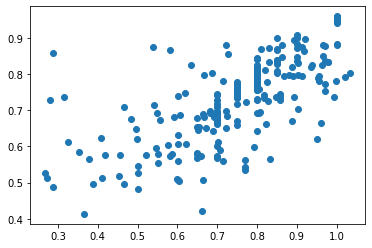

In [53]:
plt.scatter(y_test, LR_model)



In [54]:
metrics.mean_absolute_error(y_test, LR_model)


0.08057500261422312

In [55]:
metrics.mean_squared_error(y_test, LR_model)

0.014230091352725382

In [56]:
np.sqrt(metrics.mean_squared_error(y_test, LR_model))

0.11928994657021766

In [57]:
r2_score(y_test, LR_model)

0.46407647891894854

# RANDOM FOREST MODEL

In [106]:
reg = RandomForestRegressor()


In [111]:
parameter = {
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
              'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
               

}






In [112]:
reg_LR = GridSearchCV(reg, parameter, n_jobs= -1, cv=10, verbose=4)

In [113]:

reg_LR.fit(X_train, y_train)


Fitting 10 folds for each of 176 candidates, totalling 1760 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16],
                         'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             verbose=4)

In [114]:
reg_model = reg_LR.predict(X_test)

In [115]:
reg_test = pd.DataFrame([reg_model, y])
reg_test

,0,1,2,3,4,5,6,7,8,9,...,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196
0,0.482976,0.799576,0.667802,0.576023,0.631117,0.714517,0.581709,0.549291,0.636517,0.752121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.940725,0.886500,0.800570,0.800570,0.800382,0.800125,0.755167,0.753683,0.753098,0.750428,...,0.750051,0.700557,0.700505,0.700246,0.650596,0.628333,0.625625,0.625625,0.505889,0.394722


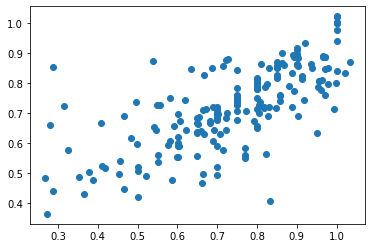

In [116]:
plt.scatter(y_test, reg_model)

In [117]:
metrics.mean_absolute_error(y_test, reg_model)

0.07143842004188758

In [118]:
metrics.mean_squared_error(y_test, reg_model)

0.012750222633718274

In [119]:
np.sqrt(metrics.mean_squared_error(y_test, reg_model))

0.11291688374073328

In [120]:
r2_score(y_test, reg_model)

0.5198102359953638